Importo las librerias NumPy (calculos de arrays) y Matplotlib (visualizción)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.show()

In [2]:
from numpy.linalg import norm as norm
def Linf(x):
    # esta funcion es la norma L-infinito
    return norm(x,np.inf)

In [3]:
def subA(A,tipo):
    # Esta funcion devuelve las matrices Lower, Diagonal y Upper (tipo= 1,2,3 respectivamente).
    dim = np.shape(A)
    n=dim[0]
    m=dim[1]
    res = np.zeros(dim)
    for i in  range(n):
        for j in range(m):
            if tipo==1:
                if i>j: res[i][j] = A[i][j]
            if tipo==2:
                if i==j: res[i][j] = A[i][j]
            if tipo==3:
                if i<j: res[i][j] = A[i][j]
    return np.array(res)

In [4]:
def SOR(A,b,w,x0=None,n_iter=1000,tol=0.0001,verbose=False,density=5):
    # Esta funcion devuelve:
    # x   = matriz cuya i-sima columna es la i-esima iteracion de X por jacobi
    # err = vector cuyo i-esimo valor es el error relativo entre las iteraciones x[n] y x[n+1] 
    # n   = numero de iteraciones hasta detenerse el algoritmo
    
    A = np.array(A)
    b = np.array(b)
    nA,mA = np.shape(A)
    L=subA(A,1)
    D=subA(A,2)
    U=subA(A,3)
    if x0 == None:  x0=np.zeros(nA)
    x=[]
    x.append(np.array(x0))
    err=[10*tol]
    for n in range(n_iter):
        iteraciones=n
        xnmas1=np.zeros(mA)
        for i in range(mA):
            xnmas1[i] =  (1-w) *  x[n][i]  +  w  *  np.linalg.inv(D)[i,i] * ( b[i] - np.matmul( L  , xnmas1)[i] - np.matmul( U , x[n])[i] )
        x.append(np.array(xnmas1))
        err.append( Linf( x[n+1] - x[n] ) / Linf(x[n])) 
        if verbose==True and np.remainder(n,density)==0:
            print("n      =",n)
            print("x["+str(n+1)+"]   =",xnmas1)
            print("err["+str(n)+"] =",err[n])
            print(".....")
        if n>0 and err[n] < tol:break
    return x, err, iteraciones-1

Los datos del problema son:

In [5]:
RQ = float(0.2)
MICROORGANISMO_CRECIMIENTO = [
                                [RQ, 0.0, 1.0, 1.0, 0.0, 2.0] , 
                                [1.0, 3.0, -1.0, -1.0, -1.0, -6.0] , 
                                [-1.0, -1.0, 20.0, 0.0, 2.0, 1.0] , 
                                [-1.0, -1.0, 0.0, 8.0, 4.0, 0.0] ,
                                [0.0, 0.0, 2.0, 0.0, 7.0, 5.0]
                            ]

In [6]:
A=np.array(MICROORGANISMO_CRECIMIENTO)[:,:-1]
print(A)

[[ 0.2  0.   1.   1.   0. ]
 [ 1.   3.  -1.  -1.  -1. ]
 [-1.  -1.  20.   0.   2. ]
 [-1.  -1.   0.   8.   4. ]
 [ 0.   0.   2.   0.   7. ]]


In [7]:
b=np.array(MICROORGANISMO_CRECIMIENTO)[:,-1]
print(b)

[ 2. -6.  1.  0.  5.]


Llamo a la funcion de SOR, verbose=True hace que imprima las iteraciones

In [8]:
x, errSOR, nSOR = SOR(A,b,w=0.5,verbose=True)

n      = 0
x[1]   = [ 5.         -1.83333333  0.10416667  0.19791667  0.3422619 ]
err[0] = 0.001
.....
n      = 5
x[6]   = [ 8.03009931 -4.21195569  0.17649106  0.16972233  0.65407051]
err[5] = 0.027794580377448332
.....
n      = 10
x[11]   = [ 8.31618954 -4.42605183  0.17808722  0.15530585  0.66315942]
err[10] = 0.003243447837446082
.....
n      = 15
x[16]   = [ 8.33503527 -4.44521441  0.17815696  0.15458444  0.66337643]
err[15] = 0.00021518671914072364
.....


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


In [9]:
w_list=np.linspace(0.25,1,10)
err=[]
n_sor=[]
for i in range(len(w_list)):
    _ , err_i , n_i = SOR(A,b,w=w_list[i])
    err.append(err_i)
    n_sor.append(n_i)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


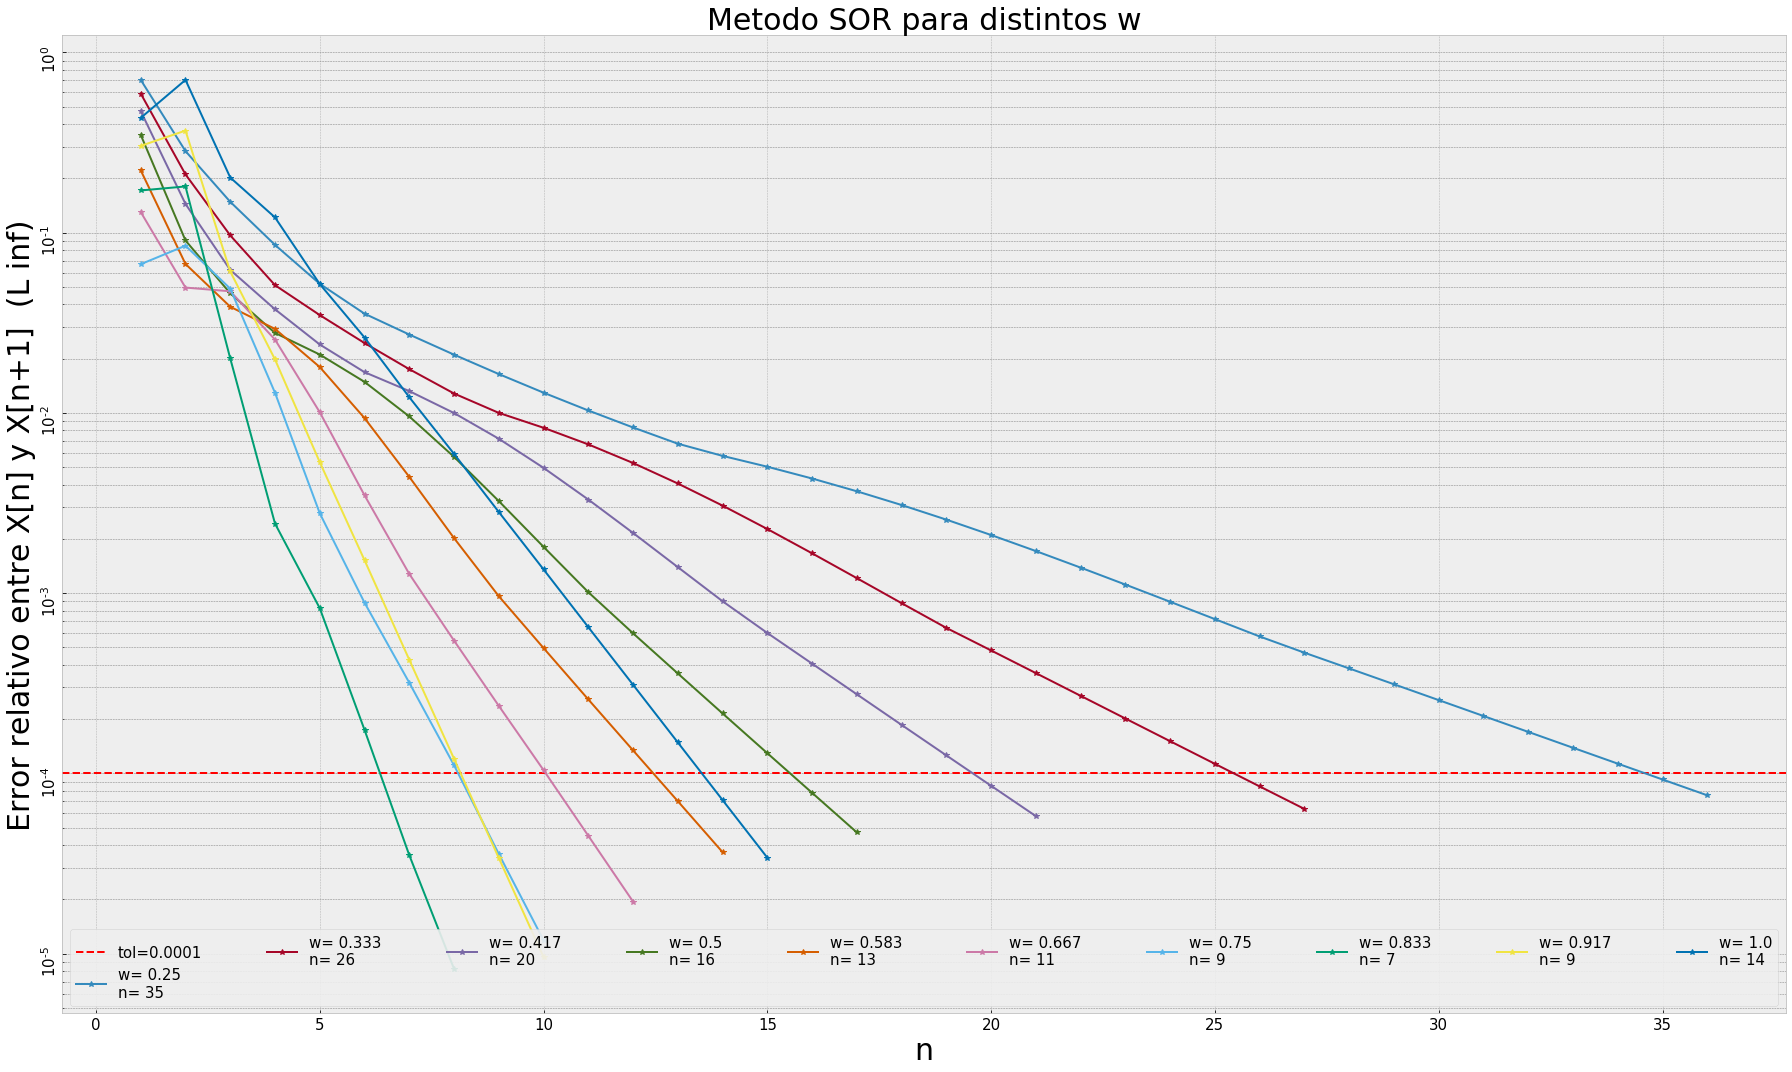

In [10]:
plt.style.use('bmh')
tol=0.0001
fig=plt.figure(figsize=(25,15))
ax = fig.add_subplot(111)
plt.yscale('log')
ax.yaxis.grid(color='gray', linestyle='dashed',which='both')
#linea horizontal de la tolerancia
ax.axhline(tol,c='r',linestyle='--',label='tol')
# Legend
labels=['tol=' + str(tol)]
for i in range(np.size(w_list)):
    plt.plot(err[i][1:],marker='*',label=i)
    label_i='w= ' + str( round(w_list[i],3)) +"\nn= " + str(n_sor[i])
    labels.append(label_i) 
handles,_ = ax.get_legend_handles_labels()
ax.legend(handles,labels,fontsize=15,mode='expand',ncol=np.size(w_list),frameon=True,framealpha=0.9)
# ticks
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
    tick.label.set_rotation('vertical')
# Titulos de Grafico y ejes
plt.title('Metodo SOR para distintos w',fontsize=30)
plt.ylabel(ylabel='Error relativo entre X[n] y X[n+1]  (L inf)',fontsize=30)
plt.xlabel(xlabel='n',fontsize=30)
plt.tight_layout()


# guardo el grafico
plt.savefig('SOR(w)1')

In [11]:
import pandas as pd

In [12]:
df=pd.DataFrame(w_list,n_sor)
df.columns=['w']
df.sort_index(inplace=True)

In [13]:
df

,w
7,0.833333
9,0.750000
9,0.916667
11,0.666667
13,0.583333
14,1.000000
16,0.500000
20,0.416667
26,0.333333
35,0.250000


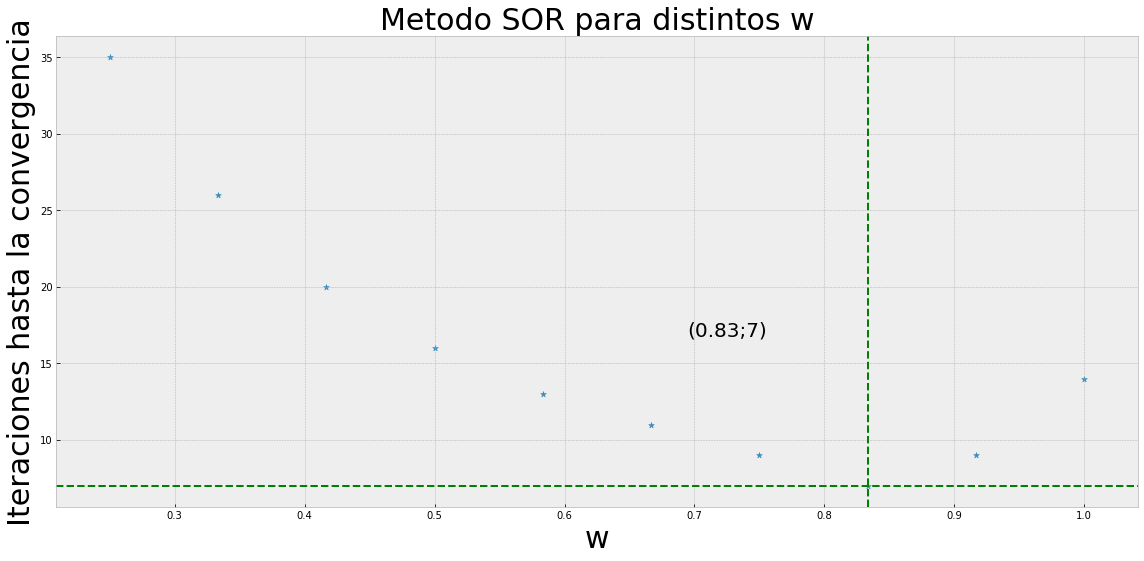

In [16]:
fig = plt.figure(figsize=(16,8))
ax=fig.add_subplot(111)
ax.scatter(df.w,df.index,marker='*')
n_min = min(df.index)
w_min = df.iloc[0,0]
#lineas verticales de los n_min
ax.axvline(w_min,c='g',linestyle='--')
ax.axhline(n_min,c='g',linestyle='--')
ax.annotate("({};{})".format(round(w_min,2),n_min),(0.6,0.4),xycoords='figure fraction',fontsize=20)
# Titulos de Grafico y ejes
plt.title('Metodo SOR para distintos w',fontsize=30)
plt.ylabel(ylabel='Iteraciones hasta la convergencia',fontsize=30)
plt.xlabel(xlabel='w',fontsize=30)
plt.tight_layout()

# guardo el grafico
plt.savefig('SOR(w)2')
plt.show()

